# Подготовили студенты Пинкевич А., Яковлева С., Старченко К.

In [ ]:
import pandas as pd #подключаем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

Загружаем наши данные в формате .csv, в рамках данной лабораторной работы будем проверять гипотезу, что выигранные игры схожи по признакам, поэтому будем предсказывать значение blue_win.


In [ ]:
#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/sample_data/MatchTimelinesFirst15.csv')
df.head(15) #наши данные, смотрим на 15 записей из набора данных

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0
5,5,3.494459e+09,1,25470.0,362.0,82.0,9.2,22856.0,319.0,86.0,8.8,9.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0
6,6,3.463321e+09,1,25391.0,350.0,96.0,9.2,23236.0,345.0,80.0,8.6,8.0,2.0,0.0,0.0,5.0,1.0,0.0,1.0
7,7,3.463280e+09,0,28946.0,367.0,65.0,9.2,26528.0,311.0,63.0,8.8,15.0,2.0,0.0,1.0,14.0,1.0,0.0,1.0
8,8,3.462719e+09,1,26928.0,379.0,80.0,9.6,23065.0,362.0,95.0,9.2,11.0,1.0,0.0,0.0,5.0,2.0,0.0,1.0
9,9,3.462734e+09,1,26079.0,302.0,106.0,9.0,27275.0,347.0,91.0,9.4,9.0,1.0,0.0,1.0,10.0,2.0,0.0,1.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               48651 non-null  int64  
 1   matchId                  48651 non-null  float64
 2   blue_win                 48651 non-null  int64  
 3   blueGold                 48651 non-null  float64
 4   blueMinionsKilled        48651 non-null  float64
 5   blueJungleMinionsKilled  48651 non-null  float64
 6   blueAvgLevel             48651 non-null  float64
 7   redGold                  48651 non-null  float64
 8   redMinionsKilled         48651 non-null  float64
 9   redJungleMinionsKilled   48651 non-null  float64
 10  redAvgLevel              48651 non-null  float64
 11  blueChampKills           48651 non-null  float64
 12  blueHeraldKills          48651 non-null  float64
 13  blueDragonKills          48651 non-null  float64
 14  blueTowersDestroyed   

Выводим набор данных по списку, исходя из информации, видно, что заполнены все ячейки, но некоторые из них нам не понадобятся, например 'matchId','Unnamed: 0', данные столбики ни на что не влияют.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


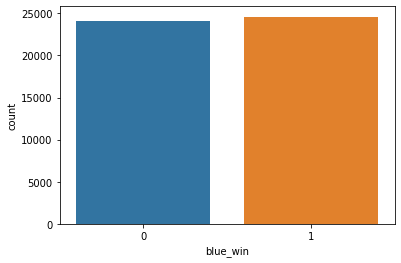

In [ ]:
sns.countplot(df['blue_win'])

In [ ]:
#убираем  столбики с ID матча,  а также с номером по порядку.
df = df.drop(['matchId','Unnamed: 0'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   blueAvgLevel             48651 non-null  float64
 5   redGold                  48651 non-null  float64
 6   redMinionsKilled         48651 non-null  float64
 7   redJungleMinionsKilled   48651 non-null  float64
 8   redAvgLevel              48651 non-null  float64
 9   blueChampKills           48651 non-null  float64
 10  blueHeraldKills          48651 non-null  float64
 11  blueDragonKills          48651 non-null  float64
 12  blueTowersDestroyed      48651 non-null  float64
 13  redChampKills            48651 non-null  float64
 14  redHeraldKills        

Строим корреляцию для наиболее наглядной картины того, что еще можно выбросить из выборки.

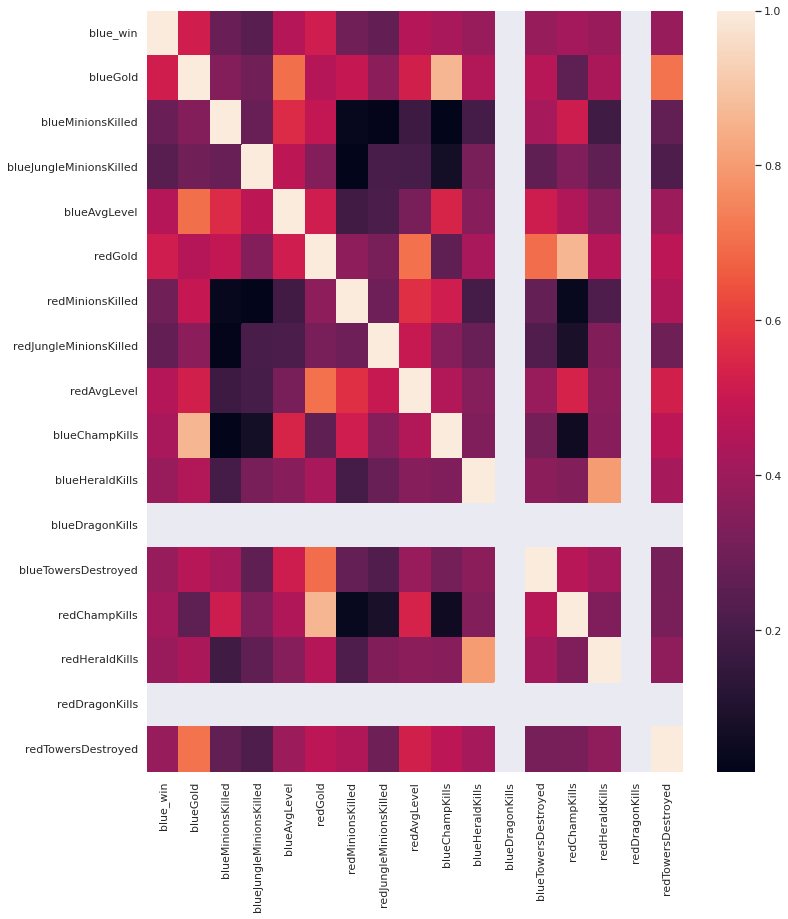

In [ ]:

# Считаем корреляцию и берем от нее модуль
corr = df.corr().abs()
# Устанавливаем размер
sns.set(rc={'figure.figsize':(12, 14)})
#Визуализируем
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Анализируем полученные данные и принимаем решение убрать ненужное.

In [ ]:
#видим, что-что не так с redDragonKills и blueDragonKills, посмотрев таблицу понимаем, что в связи с механикой игры эти строчки остаются пустыми
#Также убираем redAvgLevel и blueAvgLevel
df = df.drop(['redDragonKills','blueDragonKills','redAvgLevel','blueAvgLevel'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   redGold                  48651 non-null  float64
 5   redMinionsKilled         48651 non-null  float64
 6   redJungleMinionsKilled   48651 non-null  float64
 7   blueChampKills           48651 non-null  float64
 8   blueHeraldKills          48651 non-null  float64
 9   blueTowersDestroyed      48651 non-null  float64
 10  redChampKills            48651 non-null  float64
 11  redHeraldKills           48651 non-null  float64
 12  redTowersDestroyed       48651 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 4.8 MB


In [ ]:
#Проверим еще раз формат наших данных
df.dtypes
#все хорошо, можем продолжать

blue_win                     int64
blueGold                   float64
blueMinionsKilled          float64
blueJungleMinionsKilled    float64
redGold                    float64
redMinionsKilled           float64
redJungleMinionsKilled     float64
blueChampKills             float64
blueHeraldKills            float64
blueTowersDestroyed        float64
redChampKills              float64
redHeraldKills             float64
redTowersDestroyed         float64
dtype: object

In [ ]:
#Проверим, есть ли у нас что-либо незаполненное 
df.isna().any()

blue_win                   False
blueGold                   False
blueMinionsKilled          False
blueJungleMinionsKilled    False
redGold                    False
redMinionsKilled           False
redJungleMinionsKilled     False
blueChampKills             False
blueHeraldKills            False
blueTowersDestroyed        False
redChampKills              False
redHeraldKills             False
redTowersDestroyed         False
dtype: bool

Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую.
Проводим классификацию с помощью метода ближайших соседей.

In [ ]:
X = df[df.columns[:-1]]
y = df['blue_win']

X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=40)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
clf.score(X_test, y_test)

0.7684781715037409

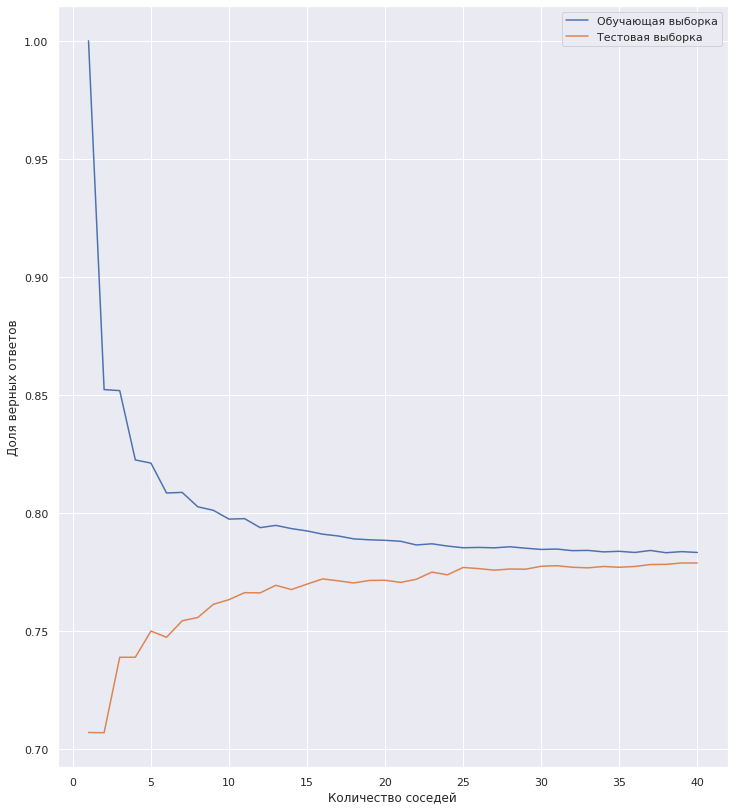

In [ ]:
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 40 включительно
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot((np.array(list(train_scores.keys())).astype(float)), (np.array(list(train_scores.values())).astype(float)), label='Обучающая выборка')
plt.plot((np.array(list(test_scores.keys())).astype(float)), (np.array(list(test_scores.values())).astype(float)), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Наш алгоритм будет работать правильно при максимальном колличестве правильных ответов тестовой выборке, в нашем случае такое достигается при k=40 соседей.